In [81]:
from IPython.display import Image
#Image(filename = 'dataset_treino/cats/cat.4.jpg')

In [82]:
#Image(filename='dataset_treino/dogs/dog.3.jpg')

In [83]:
#Image(filename='dataset_treino/cats/cat.9.jpg')

In [84]:
#Image(filename='dataset_treino/dogs/dog.8.jpg')

In [85]:
import tensorflow as tf
print("Versão do TensorFlow:", tf.__version__)

Versão do TensorFlow: 2.9.1


In [86]:
import keras as K
print("Versão do Keras:", K.__version__)

Versão do Keras: 2.9.0


In [87]:
# Imports
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Nós então inicializamos a nossa rede:

In [88]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

In [89]:
# Passo 1 - Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [90]:
# Passo 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (3, 3)))

In [91]:
# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

In [92]:
classifier.add(MaxPooling2D(pool_size = (3, 3)))

In [93]:
# Passo 3 - Flattening
classifier.add(Flatten())

In [94]:
# Passo 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [95]:
# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [96]:
# Criando os objetos train_datagen e validation_datagen com as regras de pré-processamento das imagens
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)


In [97]:
# Pré-processamento das imagens de treino e validação
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory('test',
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'binary')

Found 146 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [98]:
# Executando o treinamento (esse processo pode levar bastante tempo, dependendo do seu computador)
classifier.fit_generator(training_set,
                        # steps_per_epoch = 8000,#8000
                         epochs = 100,
                         validation_data = validation_set,
                         validation_steps = 2000)#2000

C:\Users\pitki\AppData\Local\Temp\ipykernel_1216\967584501.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set,


Epoch 1/100
5/5 [==============================] - 5s 901ms/step - loss: 0.6755 - accuracy: 0.5959 - val_loss: 0.6154 - val_accuracy: 0.7750
Epoch 2/100
5/5 [==============================] - 3s 450ms/step - loss: 0.6159 - accuracy: 0.7945
Epoch 3/100
5/5 [==============================] - 3s 516ms/step - loss: 0.5480 - accuracy: 0.8493
Epoch 4/100
5/5 [==============================] - 3s 485ms/step - loss: 0.5393 - accuracy: 0.7808
Epoch 5/100
5/5 [==============================] - 3s 501ms/step - loss: 0.5190 - accuracy: 0.7260
Epoch 6/100
5/5 [==============================] - 3s 510ms/step - loss: 0.4447 - accuracy: 0.7877
Epoch 7/100
5/5 [==============================] - 3s 488ms/step - loss: 0.4067 - accuracy: 0.8014
Epoch 8/100
5/5 [==============================] - 3s 572ms/step - loss: 0.4335 - accuracy: 0.8082
Epoch 9/100
5/5 [==============================] - 3s 561ms/step - loss: 0.3803 - accuracy: 0.8288
Epoch 10/100
5/5 [==============================] - 3s 594ms/step -

1/1 [==============================] - 0s 50ms/step


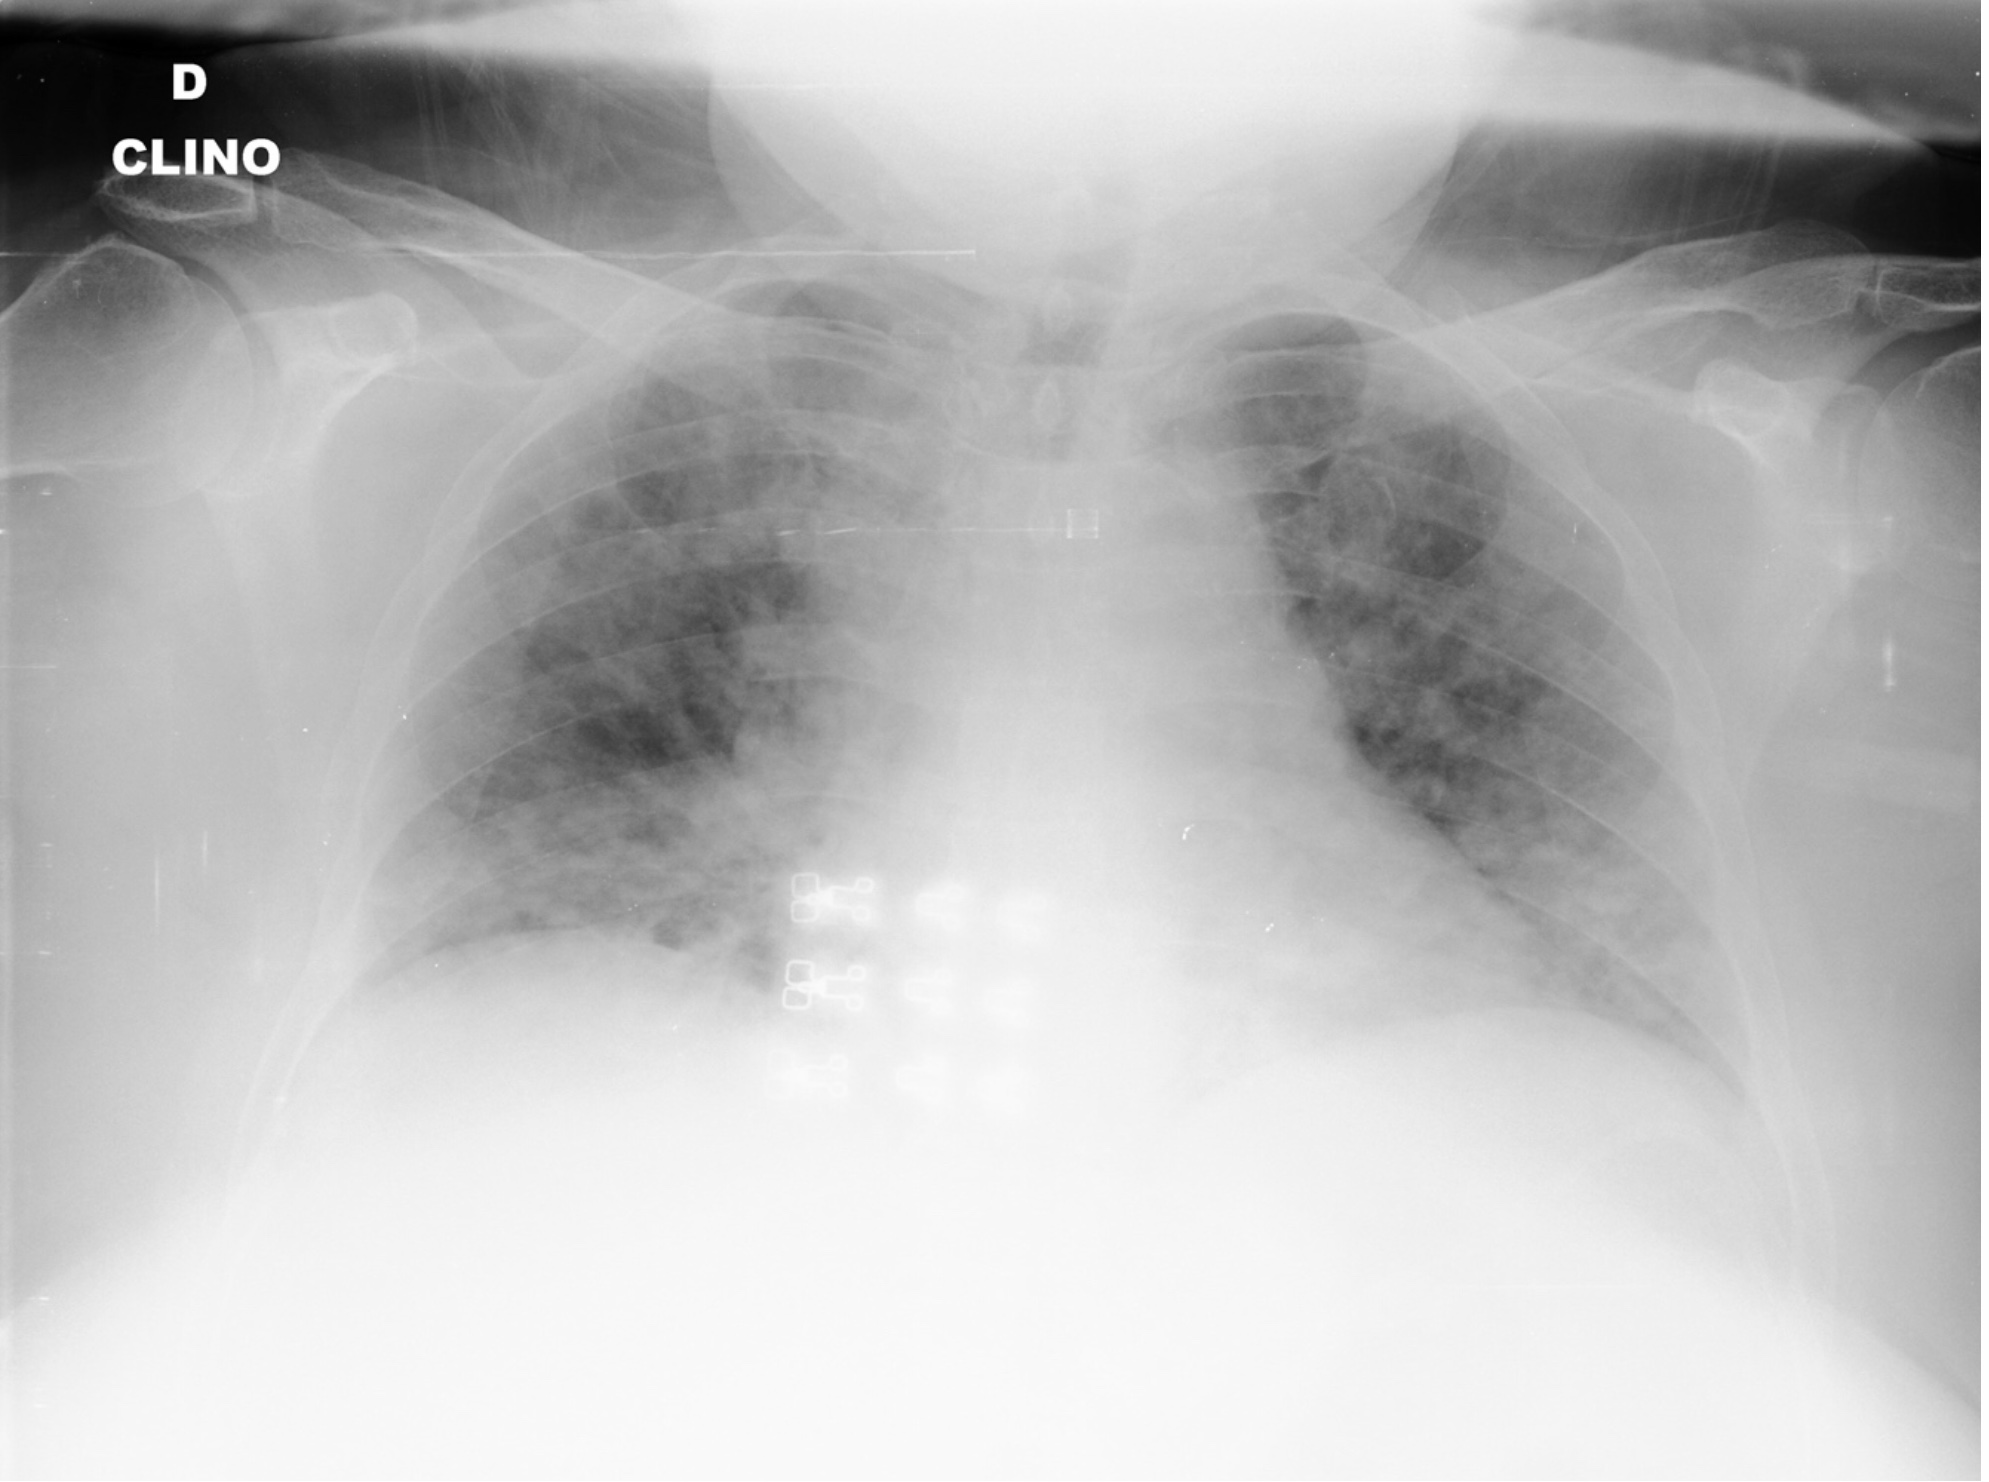

In [99]:
# Primeira Imagem
import numpy as np
import keras

test_image = keras.utils.load_img('tt.jpeg', target_size = (64, 64))
test_image = keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Pneumonia'
else:
    prediction = 'Normal'

Image(filename='tt.jpeg')

In [100]:
# Previsão da primeira imagem
prediction

'Pneumonia'

1/1 [==============================] - 0s 13ms/step


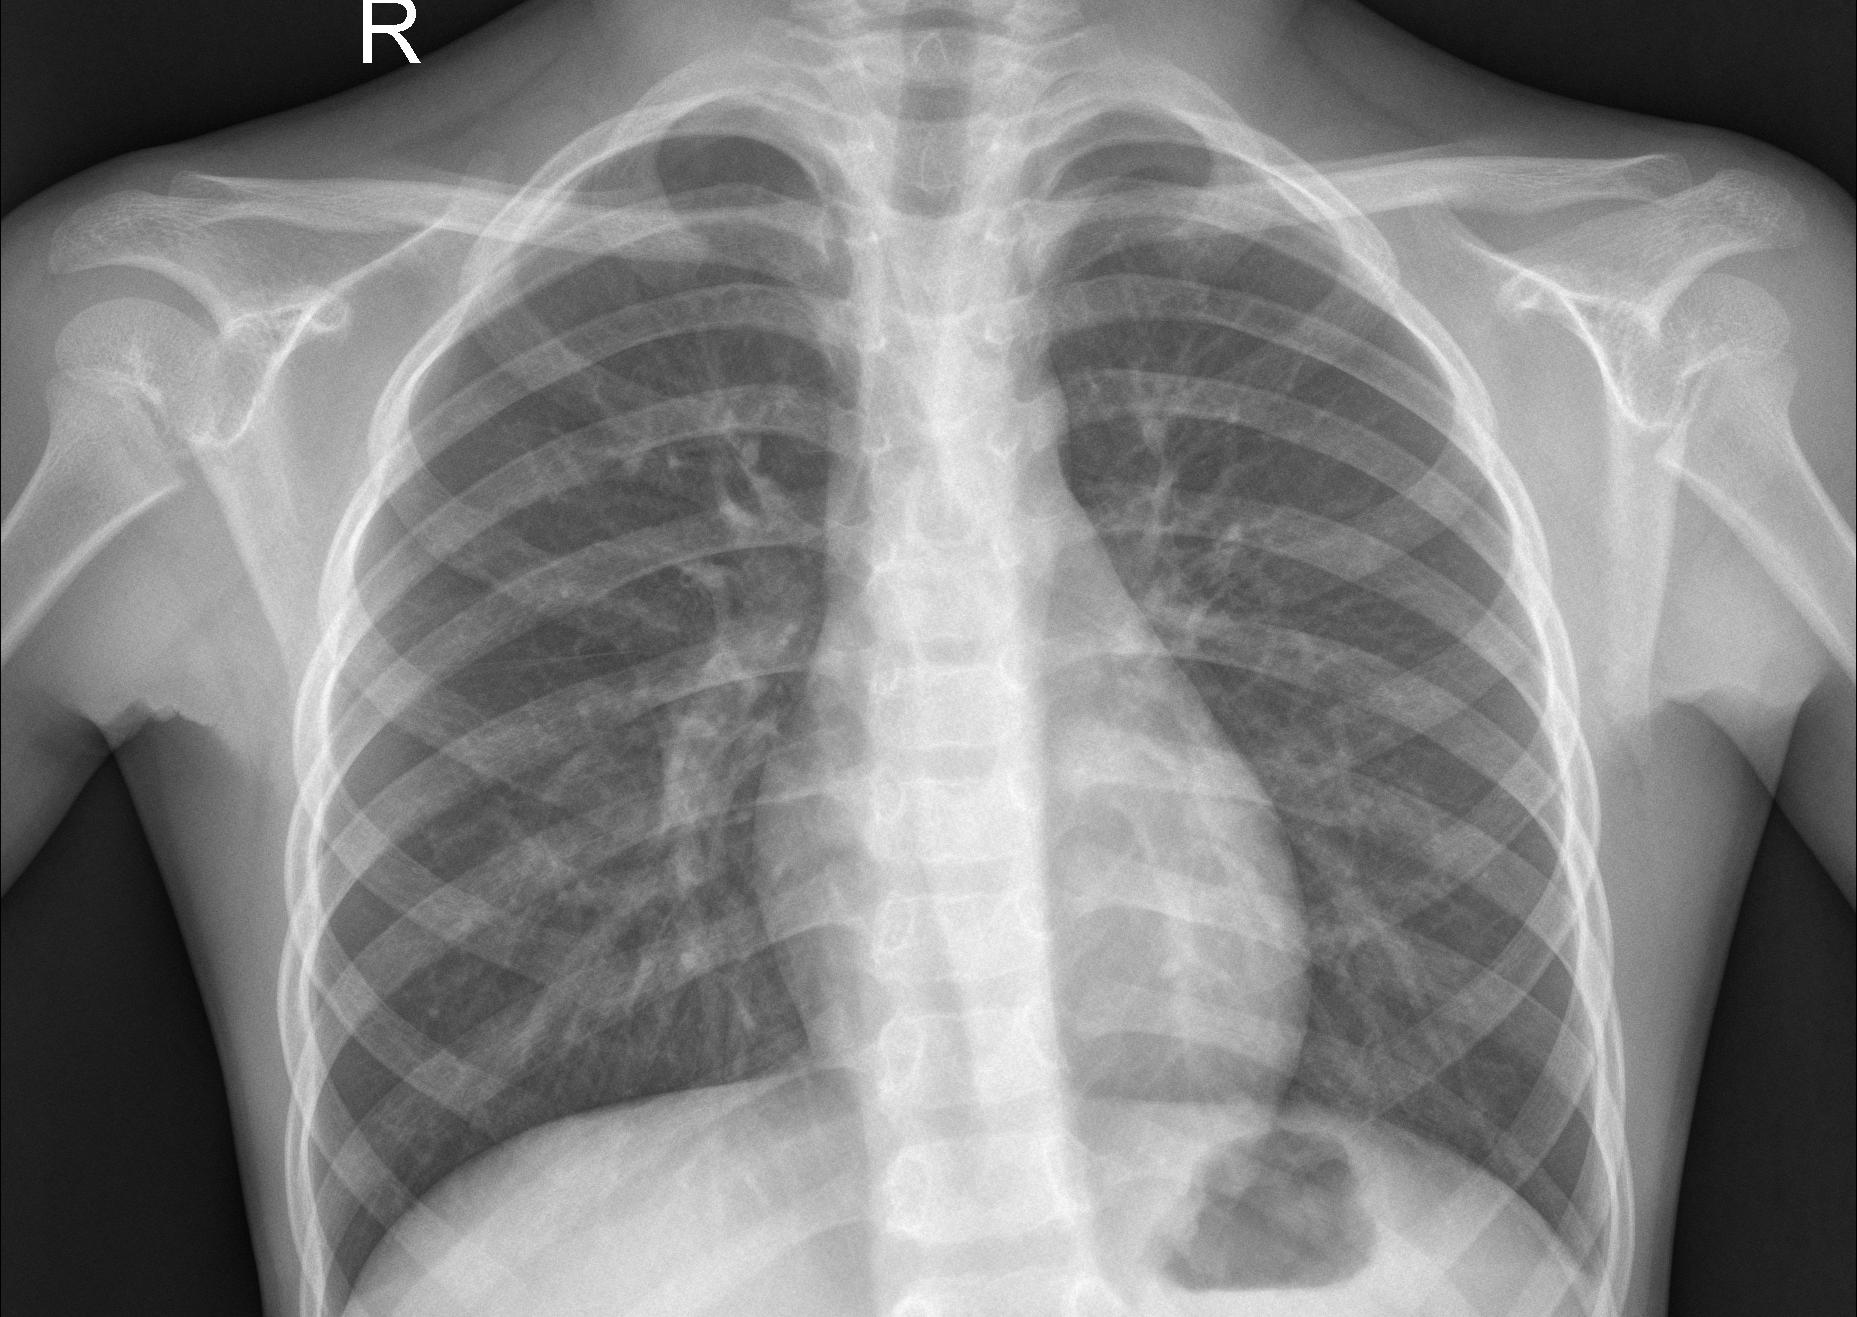

In [101]:
# Segunda Imagem
test_image = keras.utils.load_img('pneu.jpeg', target_size = (64, 64))
test_image = keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Pneumonia'
else:
    prediction = 'Normal'

Image(filename='pneu.jpeg')

In [102]:
# Previsão da segunda imagem
prediction

'Normal'